In [1]:
import numpy as np
# import logging
# logging.getLogger('tensorflow').disabled = True
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
tf.keras.utils.disable_interactive_logging()


2023-03-23 15:30:10.464211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 15:30:11.122648: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-03-23 15:30:11.122743: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-03-23 15:30:11.122750: W tensorflow/com

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  print('Invalid device or cannot modify virtual devices once initialized.',physical_devices)
  pass


2023-03-23 15:30:11.993285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:11.998711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:11.999206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
batch_size = 32
img_height = 180
img_width = 180
data_dir = '../Datasets/Imgs/'

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'train',
  image_size=(img_height, img_width),
  batch_size=batch_size)

2023-03-23 15:30:12.136178: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1503 files belonging to 2 classes.


2023-03-23 15:30:12.137875: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:12.138571: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:12.139329: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:12.720328: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 15:30:12.720632: I tensorflow/compile

In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'val',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 321 files belonging to 2 classes.


In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir+'test',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 324 files belonging to 2 classes.


In [7]:
class_names = train_ds.class_names
num_classes = len(class_names)


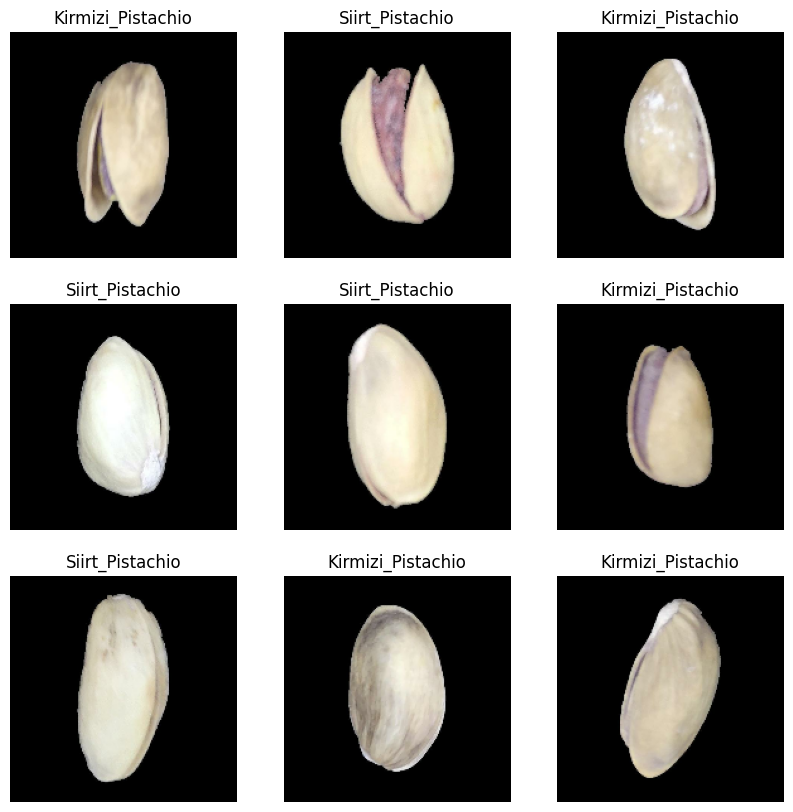

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.95577383


In [11]:
from tensorflow.keras.callbacks import TensorBoard
log_folder = 'logs'

In [12]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [13]:
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=1,
                         embeddings_freq=1)]

2023-03-23 15:30:15.390472: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-23 15:30:15.390529: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-23 15:30:15.390581: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-03-23 15:30:15.400420: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:192] cuptiSubscribe: error 15: CUPTI_ERROR_NOT_INITIALIZED
2023-03-23 15:30:15.400463: E tensorflow/core/profiler/backends/gpu/cupti_error_manager.cc:457] cuptiGetResultString: ignored due to a previous error.
2023-03-23 15:30:15.400473: E tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1715] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2023-03-23 15:30:15.400569: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-23 15:30:15.400610: E tensorflow/core/profi

In [15]:
try:
   model =  tf.keras.models.load_model('tf/pistOrd')
   print('Loading Model')
except:
   print('Creating Model')
   model = Sequential([
      data_augmentation,
      layers.Rescaling(1./255),
#       layers.Conv2D(16, 3, padding='same', activation='relu'),
#       layers.MaxPooling2D(),
#       layers.Conv2D(32, 3, padding='same', activation='relu'),
#       layers.MaxPooling2D(),
#       layers.Conv2D(64, 3, padding='same', activation='relu'),
#       layers.MaxPooling2D(),  
#       layers.Flatten(),
#       layers.Dense(128, activation='relu'),
#       layers.Dropout(0.2),
        keras.Sequential()
        layers.Dense(num_classes, name="outputs")
   ])
   model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
   )
   epochs = 15
   model.summary()
   history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
   )
   model.save('tf/pistOrd')

Creating Model


2023-03-23 15:31:42.797485: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-03-23 15:31:43.640672: W tensorflow/core/framework/op_kernel.cc:1818] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/namachu/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/namachu/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/namachu/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/namachu/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_7344/930998803.py", line 27, in <module>
      history = model.fit(
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1028, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1122, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 691, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3669, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/home/namachu/.local/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 970, in sparse_categorical_matches
      matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
required broadcastable shapes
	 [[{{node Equal}}]] [Op:__inference_train_function_13665]

In [ ]:
# import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
%load_ext tensorboard
log_folder = 'logs'

In [ ]:
%tensorboard --logdir={log_folder}

In [ ]:
# batch_size = 3
# img_height, img_width = 28, 28
# input_shape = (img_height, img_width, 3)

In [ ]:
# def create_data(data_bs, targets):
#     data_bs = pathlib.Path(data_bs)
#     splitfolders.ratio(data_bs, output='Imgs/', seed=1234, ratio=(0.7, 0.15, 0.15), group_prefix=None)
#     data_gen = ImageDataGenerator(rescale=1.0 / 255)
    
#     train_ds = data_gen.flow_from_directory('Imgs/train/', target_size=(img_height, img_width),
#                                                 class_mode='binary', batch_size=batch_size, subset='training')
#     val_ds = data_gen.flow_from_directory('Imgs/val/', target_size=(img_height, img_width),
#                                               class_mode='binary', batch_size=batch_size, shuffle=False)
#     return train_ds, val_ds

# train_ds, val_ds = create_data(data_bs='../Datasets/Pistachio_Image_Dataset/Pistachio_Image_Dataset/', targets=2)